<a href="https://colab.research.google.com/github/Renatolopo/Redes-Neurais/blob/main/RNA_Lista_de_Exerc%C3%ADcios_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNA - Lista de Exercícios II

## Instruções

As primeiras células desse notebook contém os códigos de importação do data MNIST, que contém 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Dataset MNIST

Principais campos
* **digits.images**: Dados da imagem em pixels (para visualização)
* **digits.data**: Dados da imagem em linha (vetor)
* **digits.target**: Classse (de 0 à 9)

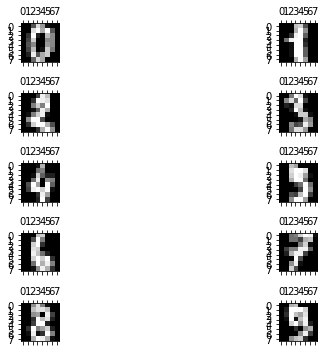

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

_, ax = plt.subplots(5, 2, figsize=(10,5))

plt.gray() 
for i in range(0,5):
  for j in range(0,2):
    ax[i][j].matshow(digits.images[j  + i*2 ]) 
plt.tight_layout()

## Funções de Ativação

In [ ]:
def sigmoide(x, derivada = False):
  if not derivada:
    return 1./(1. + np.exp(-x))
  else:
    y = sigmoide(x)
    return y*(1-y)

def relu(x, derivada = False):
  if not derivada:
    return np.maximum(x, 0)
  else:
    return np.where(np.maximum(x, 0) > 0, 1, 0) 

## Função de Custo

In [ ]:
def mse(y, yl, derivada = False):
  if not derivada:
    return ((y-yl)**2)/2
  else:
    return y-yl

## Rede de Camada Unica


In [ ]:
def rede_camada_unica(X, Y, **kwargs):
  taxa_aprendizado = kwargs.get("taxa_aprendizado",0.02)
  numero_epocas = kwargs.get("numero_epocas", 100)
  batch = kwargs.get("batch", 100)
  funcao_custo = kwargs.get("funcao_custo", mse)
  inicializacao_media = kwargs.get("inicializacao_media", 0)
  inicializacao_desvio = kwargs.get("inicializacao_desvio", 0.5)
  ativacao_camada = kwargs.get("ativacao_camada", sigmoide)
  num_in = X.shape[1]
  num_neuron = kwargs.get("num_neuron", num_in)
  num_out = Y.shape[1]
  num_inst = X.shape[0] 

  W = np.random.normal(inicializacao_media, inicializacao_desvio, (num_out, num_neuron))
  B = np.random.normal(inicializacao_media, inicializacao_desvio,(num_out, 1))

  log_erros = []

  for epocas in np.arange(numero_epocas):
    for z in np.arange(batch):
      i = np.random.randint(0, num_inst)

      # camada 1
      h1 = np.zeros(num_neuron)
      saidas = np.zeros(num_neuron)

      for neuronio in range(num_out):
        h = W[neuronio].dot(X[i, :]) + B[neuronio]
        saidas[neuronio] = ativacao_camada(h)
        h1[neuronio] = h
      
      # camada de saida
      erros = np.zeros(num_out)
      delta = np.zeros(num_out)

      for neuronio in range(num_out):
        erros[neuronio] = funcao_custo(Y[i, neuronio], saidas[neuronio])
        delta[neuronio] = funcao_custo(Y[i, neuronio], saidas[neuronio], derivada=True) * ativacao_camada(h1[neuronio], derivada=True)

        W[neuronio] += taxa_aprendizado * -delta[neuronio] * -X[i,:]
        B[neuronio] += taxa_aprendizado * -delta[neuronio]

      log_erros.append(np.mean(erros))
  return W, B, log_erros



In [ ]:
def classificar_camada_unica(x, W, B, **kwargs):
  ativacao_camada = kwargs.get("ativacao_camada", sigmoide)
  num_in = len(W)
  num_out = len(W)
  num_inst = x.shape[0]
  num_neuron = kwargs.get("num_neuron", num_in)
  ret = []
  for i in range(num_inst):

    saidas = np.zeros(num_neuron)
    for neuronio in range(num_in):
      saidas[neuronio] = ativacao_camada(W[neuronio].dot(x[i, :]) + B[neuronio])

    ret.append(np.argmax(np.where(saidas == max(saidas), 1, 0)))

  return ret

## Rede MLP

In [ ]:
# Redes MLP de 2 camadas

def rede_mlp(X, Y, **kwargs):
  taxa_aprendizado = kwargs.get("taxa_aprendizado", 0.02)
  numero_epocas = kwargs.get("numero_epocas", 100)
  batch = kwargs.get("batch", 100)
  funcao_custo = kwargs.get("funcao_custo", mse)
  inicializacao_media = kwargs.get("inicializacao_media", 0)
  inicializacao_desvio = kwargs.get("inicializacao_desvio", 0.5)
  ativacao_camada1 = kwargs.get("ativacao_camada1", sigmoide)
  ativacao_camada2 = kwargs.get("ativacao_camada2", sigmoide)
  num_in = X.shape[1]
  num_neuron = kwargs.get("num_neuron", num_in)
  num_out = Y.shape[1]
  num_inst = X.shape[0] 

  W1 = np.random.normal(inicializacao_media,inicializacao_desvio,(num_neuron, num_in))
  B1 = np.random.normal(inicializacao_media,inicializacao_desvio,(num_neuron,1))

  W2 = np.random.normal(inicializacao_media,inicializacao_desvio,(num_out, num_neuron))
  B2 = np.random.normal(inicializacao_media,inicializacao_desvio,(num_out, 1))

  log_erros = []

  for epocas in np.arange(numero_epocas):

    for z in np.arange(batch):
      i = np.random.randint(0,num_inst)

      #################################
      # Forward
      #################################

      # Camada 1
      h1 = np.zeros(num_neuron)
      saidas1 = np.zeros(num_neuron)

      for neuronio in range(num_neuron):
        h = W1[neuronio].dot(X[i,:]) + B1[neuronio]
        saidas1[neuronio] = ativacao_camada1(h)
        h1[neuronio] = h

      # Camada 2
      h2 = np.zeros(num_out)
      saidas2 = np.zeros(num_out)

      for neuronio in range(num_out):
        h = W2[neuronio].dot(saidas1) + B2[neuronio]
        saidas2[neuronio] = ativacao_camada2(h)
        h2[neuronio] = h

      #################################
      # Backward
      #################################

      # Camada de Saída

      erros = np.zeros(num_out)

      delta2 = np.zeros(num_out)

      for neuronio in range(num_out):
        erros[neuronio] = funcao_custo(Y[i,neuronio], saidas2[neuronio])
        
        delta2[neuronio] = funcao_custo(Y[i,neuronio], saidas2[neuronio], derivada=True) * ativacao_camada2(h2[neuronio], derivada=True)
        
        W2[neuronio] += taxa_aprendizado * -delta2[neuronio] * -saidas1
        B2[neuronio] += taxa_aprendizado * -delta2[neuronio]

      # Camada de Entrada
      
      for neuronio in range(num_neuron):

        delta1 = ativacao_camada1(h1[neuronio], derivada=True) * np.sum([delta2[j] * W2[j][neuronio] for j in range(num_out)])
        
        W1[neuronio] += taxa_aprendizado * -delta1 * -X[i,:]
        B1[neuronio] += taxa_aprendizado * -delta1

      log_erros.append(np.mean(erros))
  return W1, B1, W2, B2, log_erros

In [ ]:
def classificar_mlp(x, W1, B1, W2, B2, **kwargs):
  ativacao_camada1 = kwargs.get("ativacao_camada1", sigmoide)
  ativacao_camada2 = kwargs.get("ativacao_camada2", sigmoide)
  num_in = len(W1)
  num_out = len(W2)
  num_inst = x.shape[0]
  num_neuron = kwargs.get("num_neuron", num_in)
  ret = []
  for i in range(num_inst):
    
    saidas1 = np.zeros(num_neuron)
    for neuronio in range(num_in):
      saidas1[neuronio] = ativacao_camada1(W1[neuronio].dot(x[i,:]) + B1[neuronio])

    saidas2 = np.zeros(num_out)
    for neuronio in range(num_out):
      saidas2[neuronio] = ativacao_camada2(W2[neuronio].dot(saidas1) + B2[neuronio])

    ret.append(np.argmax(np.where(saidas2 == max(saidas2), 1, 0)))
  return ret


# Classificação


In [ ]:
from sklearn.model_selection import train_test_split

X = digits.data

Y = np.zeros((digits.target.shape[0], 10))
for i in range(digits.target.shape[0]):
  Y[i][digits.target[i]] = 1

X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size=0.3, random_state=0)

## Clasificação usando uma Rede de camada  Unica

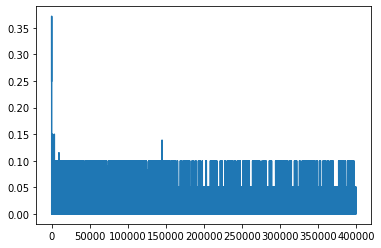

In [ ]:
W, B, erros = rede_camada_unica(X_treino, y_treino,  taxa_aprendizado = 0.08, numero_epocas=2000, batch=200)
plot(erros)

In [ ]:
resultado = classificar_camada_unica(X_teste, W, B)
accuracy_score(y_teste.argmax(axis=1), resultado)

0.34629629629629627

In [ ]:
W, B, erros = rede_camada_unica(X_treino, y_treino,  taxa_aprendizado = 0.01, numero_epocas=2000, batch=200)
resultado = classificar_camada_unica(X_teste, W, B)
accuracy_score(y_teste.argmax(axis=1), resultado)

0.40370370370370373

In [ ]:
W, B, erros = rede_camada_unica(X_treino, y_treino,  taxa_aprendizado = 0.015, numero_epocas=3000, batch=200)
resultado = classificar_camada_unica(X_teste, W, B)
accuracy_score(y_teste.argmax(axis=1), resultado)

0.3074074074074074

In [ ]:
W, B, erros = rede_camada_unica(X_treino, y_treino,  taxa_aprendizado = 0.07, numero_epocas=3000, batch=200)
resultado = classificar_camada_unica(X_teste, W, B)
accuracy_score(y_teste.argmax(axis=1), resultado)

0.3648148148148148

## Classificação usando Redes MLP 

In [ ]:
#treinamento
W1, B1, W2, B2, log_erros = rede_mlp(X_treino, y_treino, taxa_aprendizado = 0.045, numero_epocas=250)

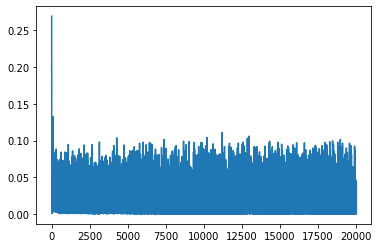

In [ ]:
# Visualização dos erros
plt.plot(log_erros)

In [ ]:
resultado = classificar_mlp(X_teste, W1, B1, W2, B2)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_teste.argmax(axis=1), resultado)

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  1,  1,  0,  0,  1],
       [ 0,  1, 50,  0,  0,  0,  0,  1,  1,  0],
       [ 0,  0,  0, 49,  0,  1,  0,  1,  2,  1],
       [ 0,  0,  0,  0, 46,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0, 52,  1,  0,  1,  3],
       [ 0,  0,  0,  0,  0,  0, 60,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 53,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 58,  1],
       [ 0,  0,  0,  2,  0,  2,  0,  0,  1, 52]])

In [ ]:
# Verificando a acuracia do modelo

accuracy_score(y_teste.argmax(axis=1), resultado)

0.9518518518518518

In [ ]:
W1, B1, W2, B2, log_erros = rede_mlp(X_treino, y_treino, taxa_aprendizado = 0.075, numero_epocas=250)
resultado = classificar_mlp(X_teste, W1, B1, W2, B2)
accuracy_score(y_teste.argmax(axis=1), resultado)

0.9537037037037037

In [ ]:
W1, B1, W2, B2, log_erros = rede_mlp(X_treino, y_treino, taxa_aprendizado = 0.1, numero_epocas=250)
resultado = classificar_mlp(X_teste, W1, B1, W2, B2)
accuracy_score(y_teste.argmax(axis=1), resultado)

0.9574074074074074

In [ ]:
W1, B1, W2, B2, log_erros = rede_mlp(X_treino, y_treino, taxa_aprendizado = 0.0389, numero_epocas=300)
resultado = classificar_mlp(X_teste, W1, B1, W2, B2)
accuracy_score(y_teste.argmax(axis=1), resultado)

0.8722222222222222